## Looking into phenotype data
seeing if there are any patterns with my methylation data

In [64]:
#BiocManager::install('ggsignif')
#BiocManager::install('wesanderson')

In [1]:
library(ggsignif)
library(tidyverse)
library(ggsci)
library(wesanderson)
library(viridis)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: viridisLite


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




## I. Read in and clean data frames
first reading in growth data for our oysters

In [2]:
meta <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/CV_CE_phenotype_meta.csv')
head(meta)

,sample,phase1_rep,phase2_rep,tag,methylation.,X16s.,tag2,combined,Oyster.Code,Phase.1.DO.Treatment,⋯,Final.Dry.Mass..g.,Initial.Shell.Mass..g.,Initial.Tissue.Mass..g.,Final.Shell.Mass..g.,Final.Tissue.Mass..g.,Shell.Growth..g.,Shell.Growth..mg.,Tissue.Growth..g.,Tissue.Growth..mg.,Tissue.Shell.Growth
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018--BBB-WBO-B21-CV,BBB,WBO,B21,yes,no,21B,BBBWBO21B,21B,Hypoxic,⋯,0.3187,0.20360665,0.07299335,0.2386784,0.08002160,0.03507175,35.07175,0.00702825,7.02825,0.2003963
2,2018--WBB-WBV-W69-CV,WBB,WBV,W69,yes,no,69W,WBBWBV69W,69W,Normoxic,⋯,0.2334,0.14677610,0.05142390,0.1691075,0.06429250,0.02233140,22.33140,0.01286860,12.86860,0.5762559
3,2018--BBB-WBV-B70-CV,BBB,WBV,B70,yes,no,70B,BBBWBV70B,70B,Hypoxic,⋯,0.3176,0.20704225,0.11495775,0.2037498,0.11385020,-0.00329250,-3.29245,-0.00110760,-1.10755,0.3363908
4,2018--BBO-BBO-B16-CV,BBO,BBO,B16,yes,no,16B,BBOBBO16B,16B,Hypoxic,⋯,0.1332,0.09653045,0.02076955,0.1104160,0.02278400,0.01388555,13.88555,0.00201445,2.01445,0.1450753
5,2018--WBG-WBG-W44-CV,WBG,WBG,W44,yes,no,44W,WBGWBG44W,44W,Normoxic,⋯,0.5151,0.29636785,0.11763215,0.3749572,0.14014280,0.07858935,78.58935,0.02251065,22.51065,0.2864338
6,2018--BBO-WBO-B16-CV,BBO,WBO,B16,yes,no,16B,BBOWBO16B,16B,Hypoxic,⋯,0.3113,0.21577440,0.05172560,0.2522777,0.05902235,0.03650325,36.50325,0.00729675,7.29675,0.1998932


only grabbing samples that we have methylation data for 

In [3]:
meta2 <- filter(meta, meta$methylation == 'yes')
dim(meta2) # 30 samples
head(meta2)

[1] 30 28

,sample,phase1_rep,phase2_rep,tag,methylation.,X16s.,tag2,combined,Oyster.Code,Phase.1.DO.Treatment,⋯,Final.Dry.Mass..g.,Initial.Shell.Mass..g.,Initial.Tissue.Mass..g.,Final.Shell.Mass..g.,Final.Tissue.Mass..g.,Shell.Growth..g.,Shell.Growth..mg.,Tissue.Growth..g.,Tissue.Growth..mg.,Tissue.Shell.Growth
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018--BBB-WBO-B21-CV,BBB,WBO,B21,yes,no,21B,BBBWBO21B,21B,Hypoxic,⋯,0.3187,0.20360665,0.07299335,0.2386784,0.08002160,0.03507175,35.07175,0.00702825,7.02825,0.2003963
2,2018--WBB-WBV-W69-CV,WBB,WBV,W69,yes,no,69W,WBBWBV69W,69W,Normoxic,⋯,0.2334,0.14677610,0.05142390,0.1691075,0.06429250,0.02233140,22.33140,0.01286860,12.86860,0.5762559
3,2018--BBB-WBV-B70-CV,BBB,WBV,B70,yes,no,70B,BBBWBV70B,70B,Hypoxic,⋯,0.3176,0.20704225,0.11495775,0.2037498,0.11385020,-0.00329250,-3.29245,-0.00110760,-1.10755,0.3363908
4,2018--BBO-BBO-B16-CV,BBO,BBO,B16,yes,no,16B,BBOBBO16B,16B,Hypoxic,⋯,0.1332,0.09653045,0.02076955,0.1104160,0.02278400,0.01388555,13.88555,0.00201445,2.01445,0.1450753
5,2018--WBG-WBG-W44-CV,WBG,WBG,W44,yes,no,44W,WBGWBG44W,44W,Normoxic,⋯,0.5151,0.29636785,0.11763215,0.3749572,0.14014280,0.07858935,78.58935,0.02251065,22.51065,0.2864338
6,2018--BBO-WBO-B16-CV,BBO,WBO,B16,yes,no,16B,BBOWBO16B,16B,Hypoxic,⋯,0.3113,0.21577440,0.05172560,0.2522777,0.05902235,0.03650325,36.50325,0.00729675,7.29675,0.1998932


In [4]:
# only selecting growth variables i'm interested in
meta_df <- select(meta2, sample, Tissue.Shell.Growth, Shell.Growth..mg.,Tissue.Growth..mg.)

colnames(meta_df) <- c('sample','t.s_ratio', 's.growth_mg', 't.growth_mg')
head(meta_df)

,sample,t.s_ratio,s.growth_mg,t.growth_mg
,<chr>,<dbl>,<dbl>,<dbl>
1,2018--BBB-WBO-B21-CV,0.2003963,35.07175,7.02825
2,2018--WBB-WBV-W69-CV,0.5762559,22.33140,12.86860
3,2018--BBB-WBV-B70-CV,0.3363908,-3.29245,-1.10755
4,2018--BBO-BBO-B16-CV,0.1450753,13.88555,2.01445
5,2018--WBG-WBG-W44-CV,0.2864338,78.58935,22.51065
6,2018--BBO-WBO-B16-CV,0.1998932,36.50325,7.29675


need to clean up sample names to follow same pattern that I have in the meta data

In [5]:
cleaned_col_names <- sub('^2018--(.+)-CV$', '\\1', meta_df$sample)
head(cleaned_col_names)

meta_df$sample <- cleaned_col_names
head(meta_df)

[1] "BBB-WBO-B21" "WBB-WBV-W69" "BBB-WBV-B70" "BBO-BBO-B16" "WBG-WBG-W44"
[6] "BBO-WBO-B16"

,sample,t.s_ratio,s.growth_mg,t.growth_mg
,<chr>,<dbl>,<dbl>,<dbl>
1,BBB-WBO-B21,0.2003963,35.07175,7.02825
2,WBB-WBV-W69,0.5762559,22.33140,12.86860
3,BBB-WBV-B70,0.3363908,-3.29245,-1.10755
4,BBO-BBO-B16,0.1450753,13.88555,2.01445
5,WBG-WBG-W44,0.2864338,78.58935,22.51065
6,BBO-WBO-B16,0.1998932,36.50325,7.29675


In [6]:
# reading in meta data on treatments
treatment <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/counts_and_meta/CV_CE18_meta.csv')

# only grabbing columns I'm interested in
treatment <- select(treatment, unique_ID, Phase1, Phase2)

# changing column names
colnames(treatment) <- c('sample','Phase1','Phase2')

head(treatment)

,sample,Phase1,Phase2
,<chr>,<chr>,<chr>
1,BBB-WBO-B21,hypoxic,control
2,BBB-WBV-B70,hypoxic,control
3,BBO-BBO-B16,hypoxic,hypoxic
4,BBO-BBY-B27,hypoxic,hypoxic
5,BBO-WBO-B16,hypoxic,control
6,BBO-WBV-B64,hypoxic,control


In [7]:
# combine data frames to have all info 
df <- merge(treatment, meta_df, by='sample')
head(df)

,sample,Phase1,Phase2,t.s_ratio,s.growth_mg,t.growth_mg
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,BBB-WBO-B21,hypoxic,control,0.2003963,35.07175,7.02825
2,BBB-WBV-B70,hypoxic,control,0.3363908,-3.29245,-1.10755
3,BBO-BBO-B16,hypoxic,hypoxic,0.1450753,13.88555,2.01445
4,BBO-BBY-B27,hypoxic,hypoxic,0.4422550,64.27435,28.42565
5,BBO-WBO-B16,hypoxic,control,0.1998932,36.50325,7.29675
6,BBO-WBV-B64,hypoxic,control,0.4180511,47.81210,19.98790


## II. Phase 1 Warm vs. Control

In [8]:
# pulling out only samples that were warm or control for phase 1
p1_wc <- filter(df, df$Phase1 == 'warm' | df$Phase1 == 'control')
p1_wc

sample,Phase1,Phase2,t.s_ratio,s.growth_mg,t.growth_mg
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
WBB-WBV-W69,control,control,0.5762559,22.33140,12.86860
WBG-BBB-W56,control,hypoxic,0.5746725,77.73045,44.66955
WBG-WBG-W44,control,control,0.2864338,78.58935,22.51065
WBO-BBR-W03,control,hypoxic,0.4874679,16.60540,8.09460
WBO-WBV-W64,control,control,0.2676888,44.80595,11.99405
WBR-BBY-W25,control,hypoxic,0.2395642,19.03895,4.56105
WBV-WBO-W23,control,control,0.3508731,21.61565,7.58435
WBV-WBR-W12,control,control,0.4540844,26.33960,11.96040
WBY-BBV-W65,control,hypoxic,0.4893996,15.17390,7.42610


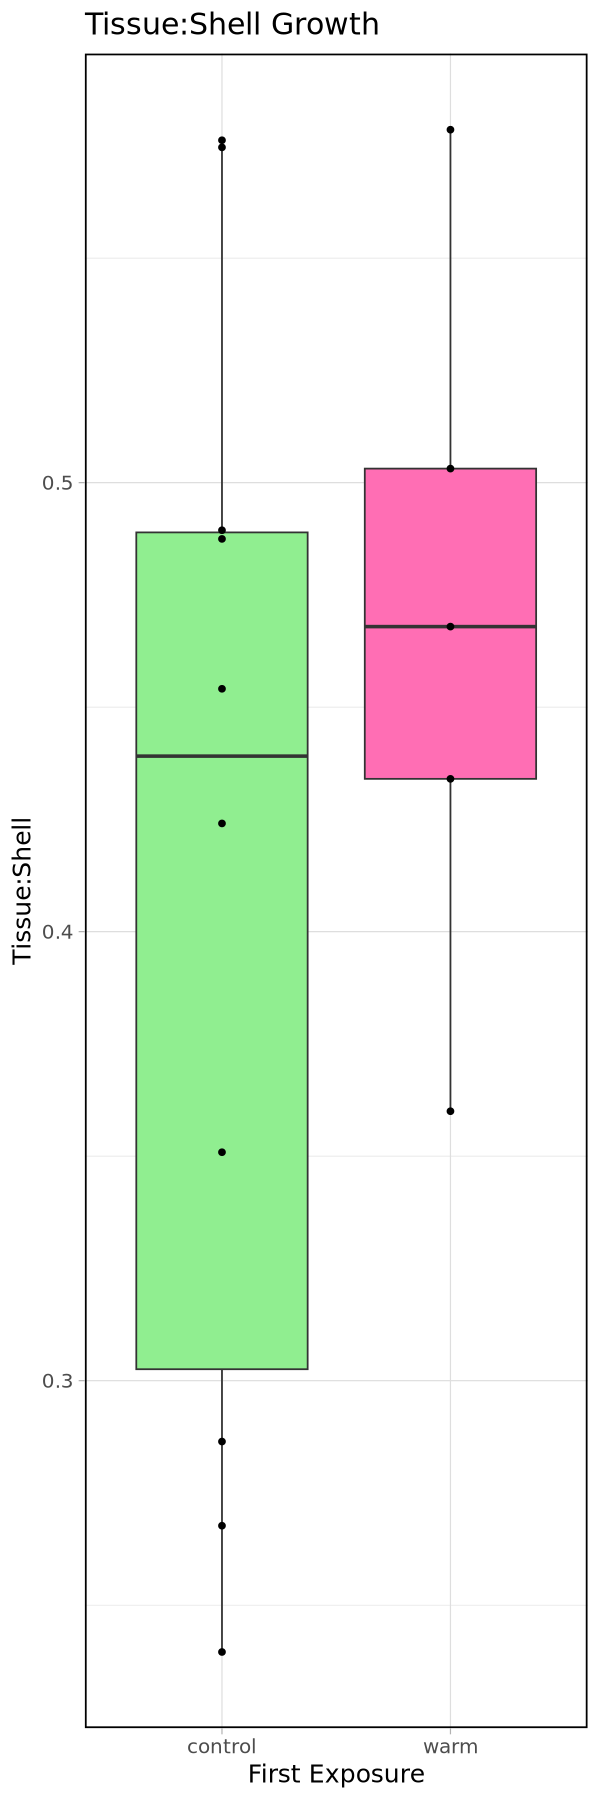

In [39]:
plot1 <- ggplot(p1_wc, aes(x=Phase1, y=t.s_ratio, fill=Phase1)) +
geom_boxplot(show.legend = FALSE) +
geom_point(show.legend = FALSE) +
theme_light(base_size = 15) +
theme(panel.border = element_rect(color = 'black', fill = NA, linewidth = 1)) +
scale_fill_manual(values = c('lightgreen','hotpink1')) +
labs(title = 'Tissue:Shell Growth', 
    x = 'First Exposure', y = 'Tissue:Shell')
#geom_signif(comparisons = list(c('warm','control')), map_signif_level=TRUE)

plot1

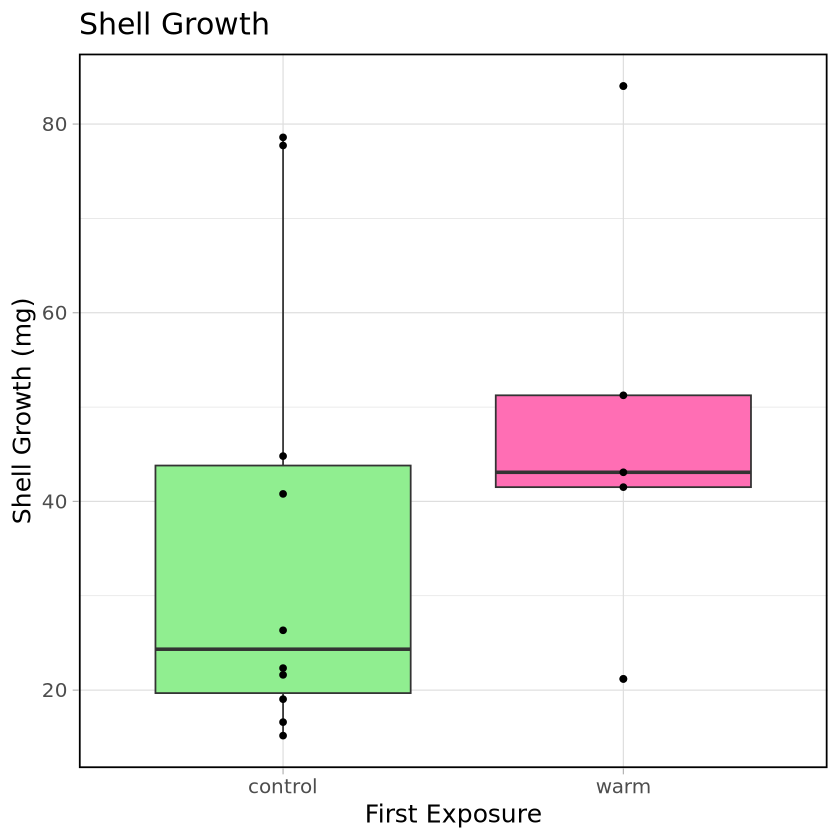

In [10]:
plot2 <- ggplot(p1_wc, aes(x=Phase1, y=s.growth_mg, fill=Phase1)) +
geom_boxplot(show.legend = FALSE) +
geom_point(show.legend = FALSE) +
theme_light(base_size = 15) +
theme(panel.border = element_rect(color = 'black', fill = NA, linewidth = 1)) +
scale_fill_manual(values = c('lightgreen','hotpink1')) +
labs(title = 'Shell Growth', 
    x = 'First Exposure', y = 'Shell Growth (mg)') 
#geom_signif(comparisons = list(c('warm','control')), map_signif_level=TRUE)

plot2

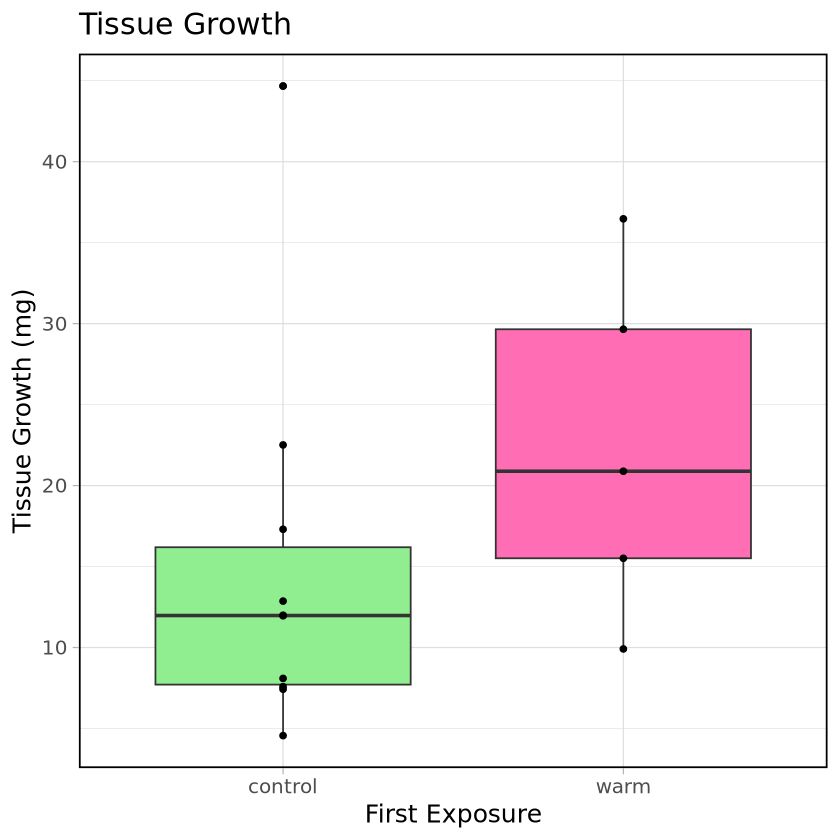

In [11]:
plot3 <- ggplot(p1_wc, aes(x=Phase1, y=t.growth_mg, fill=Phase1)) +
geom_boxplot(show.legend = FALSE) +
geom_point(show.legend = FALSE) +
theme_light(base_size = 15) +
theme(panel.border = element_rect(color = 'black', fill = NA, linewidth = 1)) +
scale_fill_manual(values = c('lightgreen','hotpink1')) +
labs(title = 'Tissue Growth', 
    x = 'First Exposure', y = 'Tissue Growth (mg)') 
#geom_signif(comparisons = list(c('warm','control')), map_signif_level=TRUE)

plot3

combining all of the phase 1 warm vs. control plots together

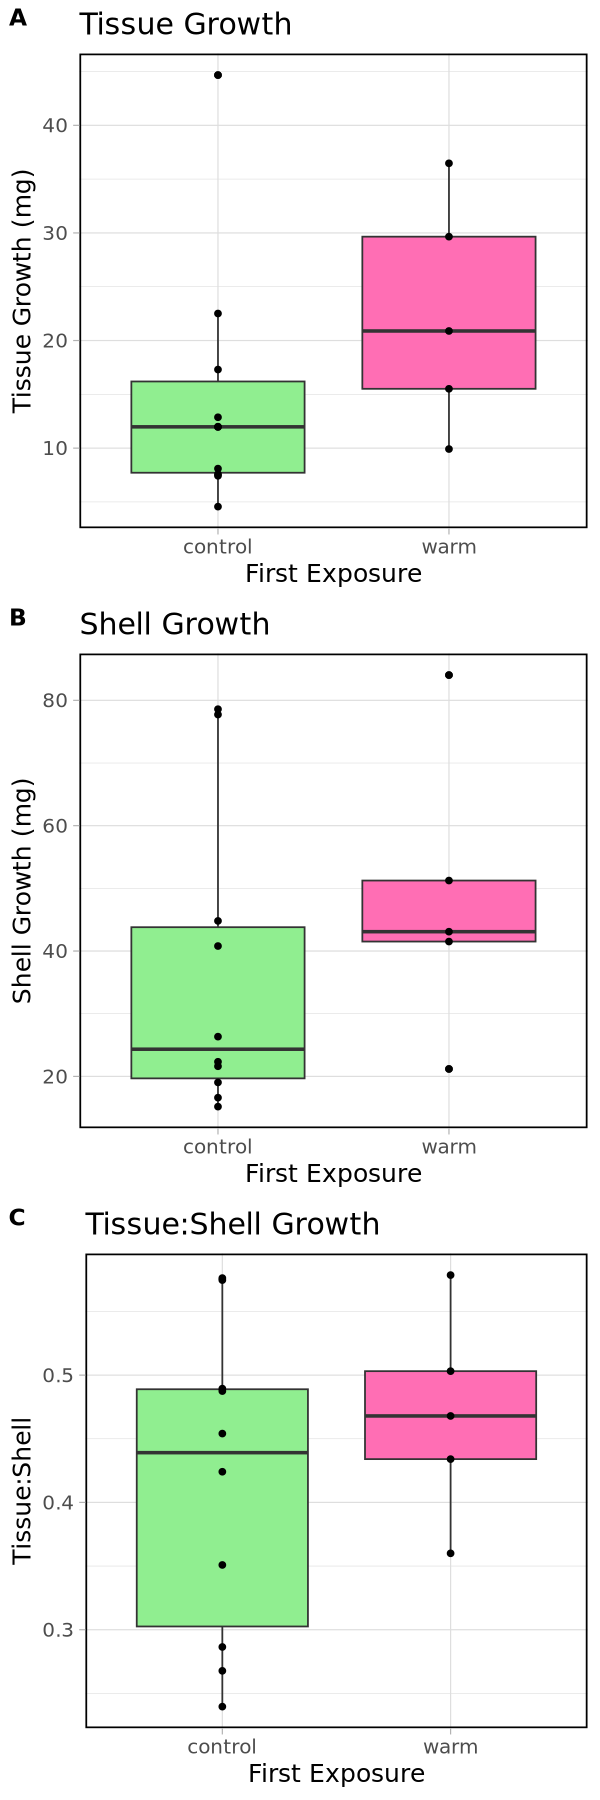

In [41]:
options(repr.plot.width=5, repr.plot.height=15)

combined_plot <- plot_grid(plot3, plot2, plot1, align = 'h', nrow =3, labels='AUTO')

combined_plot

In [13]:
# saving plot as pdf file

# open pdf file
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures')
pdf('p1_wc_phenotypes.pdf', width=10, height=15)

# open plot
combined_plot <- plot_grid(plot2, plot3, plot1, align = 'h', nrow =3, labels='AUTO')

# now add the title
title <- ggdraw() + 
  draw_label(
    "Phenotypic effects of early exposure to warming",
    fontface = 'bold',
    x = 0,
    hjust = 0
  ) +
  theme(
    # add margin on the left of the drawing canvas,
    # so title is aligned with left edge of first plot
    plot.margin = margin(0, 0, 0, 7)
  )
plot_grid(
  title, combined_plot,
  ncol = 1,
  # rel_heights values control vertical title margins
  rel_heights = c(0.1, 1)
)

# close pdf file
dev.off()

png 
  2

## III. Effects of early exposure to hypoxia on second exposure
aka phase1=hypoxia, phase2=hypoxia or control

In [14]:
p1h <- filter(df, df$Phase1 == 'hypoxic')
p1h

sample,Phase1,Phase2,t.s_ratio,s.growth_mg,t.growth_mg
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
BBB-WBO-B21,hypoxic,control,0.20039633,35.07175,7.02825
BBB-WBV-B70,hypoxic,control,0.33639083,-3.29245,-1.10755
BBO-BBO-B16,hypoxic,hypoxic,0.14507528,13.88555,2.01445
BBO-BBY-B27,hypoxic,hypoxic,0.44225496,64.27435,28.42565
BBO-WBO-B16,hypoxic,control,0.19989316,36.50325,7.29675
BBO-WBV-B64,hypoxic,control,0.41805108,47.81210,19.98790
BBR-BBB-B50,hypoxic,hypoxic,0.26192917,13.31295,3.48705
BBR-BBG-B38,hypoxic,hypoxic,0.30028427,48.52785,14.57215
BBR-BBY-B26,hypoxic,hypoxic,0.43439283,10.73625,4.66375


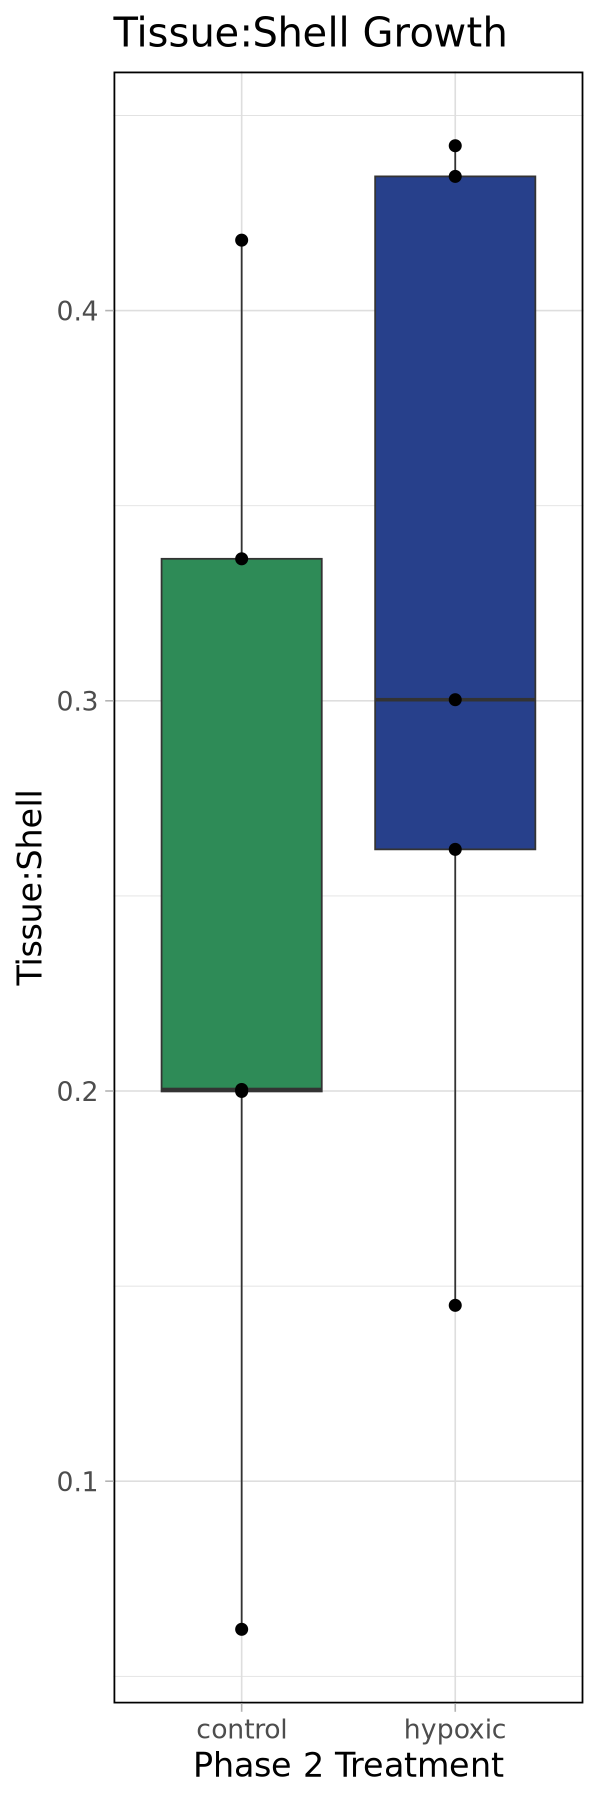

In [15]:
plot4 <- ggplot(p1h, aes(x=Phase2, y=t.s_ratio, fill=Phase2)) +
geom_boxplot(show.legend = FALSE) +
#geom_crossbar(stat = "summary", fun = mean, width = 0.5, show.legend = FALSE, col = 'black') +
geom_point(show.legend = FALSE, size =3) +
theme_light(base_size = 20) +
theme(panel.border = element_rect(color = 'black', fill = NA, linewidth = 1)) +
scale_fill_manual(values = c('seagreen4','royalblue4')) +
labs(title = 'Tissue:Shell Growth', 
    x = 'Phase 2 Treatment', y = 'Tissue:Shell')
#geom_signif(comparisons = list(c('hypoxic','control')), map_signif_level=TRUE)

plot4

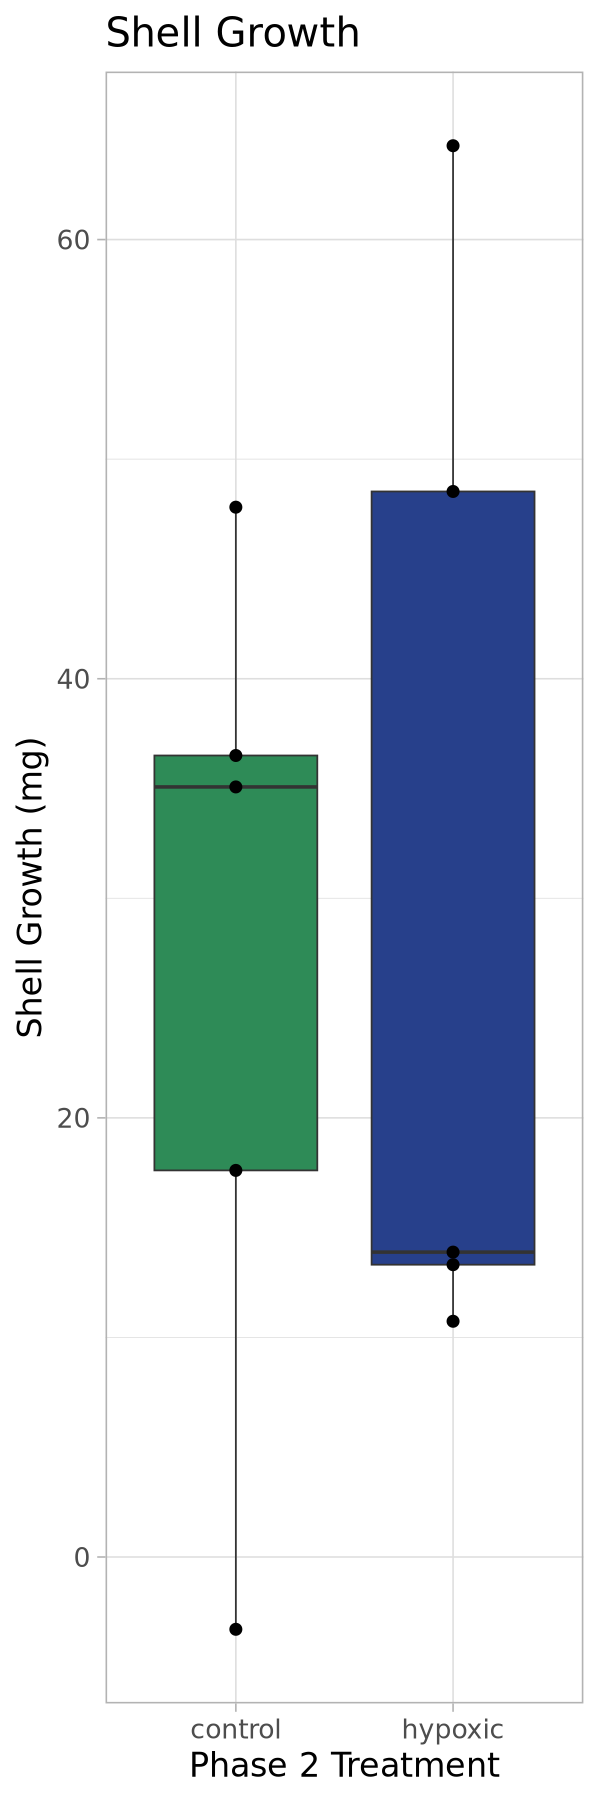

In [16]:
plot5 <- ggplot(p1h, aes(x=Phase2, y=s.growth_mg, fill=Phase2)) +
geom_boxplot(show.legend = FALSE) +
#geom_crossbar(stat = "summary", fun = mean, width = 0.5, show.legend = FALSE, col = 'black') +
geom_point(show.legend = FALSE, size =3) +
theme(panel.border = element_rect(color = 'black', fill = NA, linewidth = 1)) +
theme_light(base_size = 20) +
scale_fill_manual(values = c('seagreen4','royalblue4')) +
labs(title = 'Shell Growth', 
    x = 'Phase 2 Treatment', y = 'Shell Growth (mg)')
#geom_signif(comparisons = list(c('hypoxic','control')), map_signif_level=TRUE)

plot5

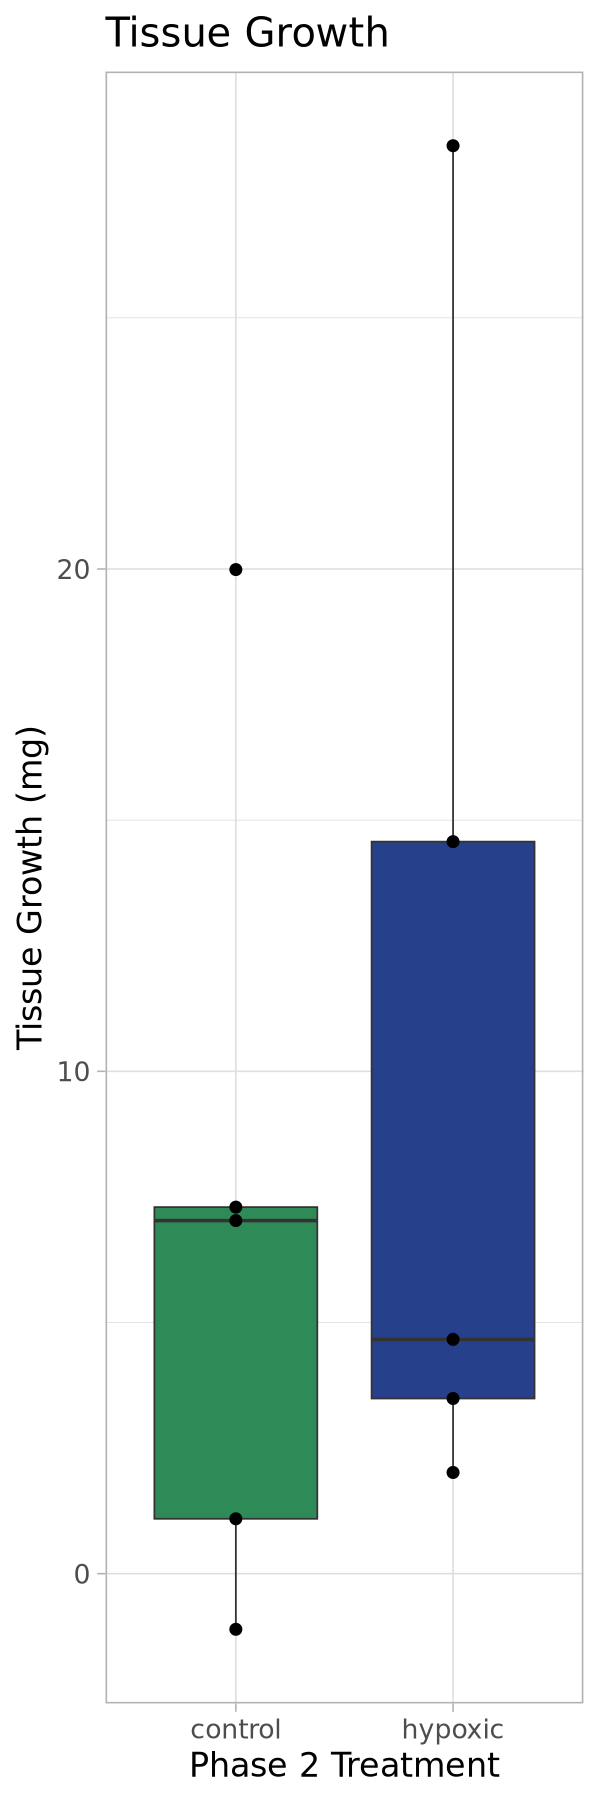

In [17]:
plot6 <- ggplot(p1h, aes(x=Phase2, y=t.growth_mg, fill=Phase2)) +
geom_boxplot(show.legend = FALSE) +
#geom_crossbar(stat = "summary", fun = mean, width = 0.5, show.legend = FALSE, col = 'black') +
geom_point(show.legend = FALSE, size=3) +
theme(panel.border = element_rect(color = 'black', fill = NA, linewidth = 1)) +
theme_light(base_size = 20) +
scale_fill_manual(values = c('seagreen4','royalblue4')) +
labs(title = 'Tissue Growth', 
    x = 'Phase 2 Treatment', y = 'Tissue Growth (mg)') 
#geom_signif(comparisons = list(c('hypoxic','control')), map_signif_level=TRUE)

plot6

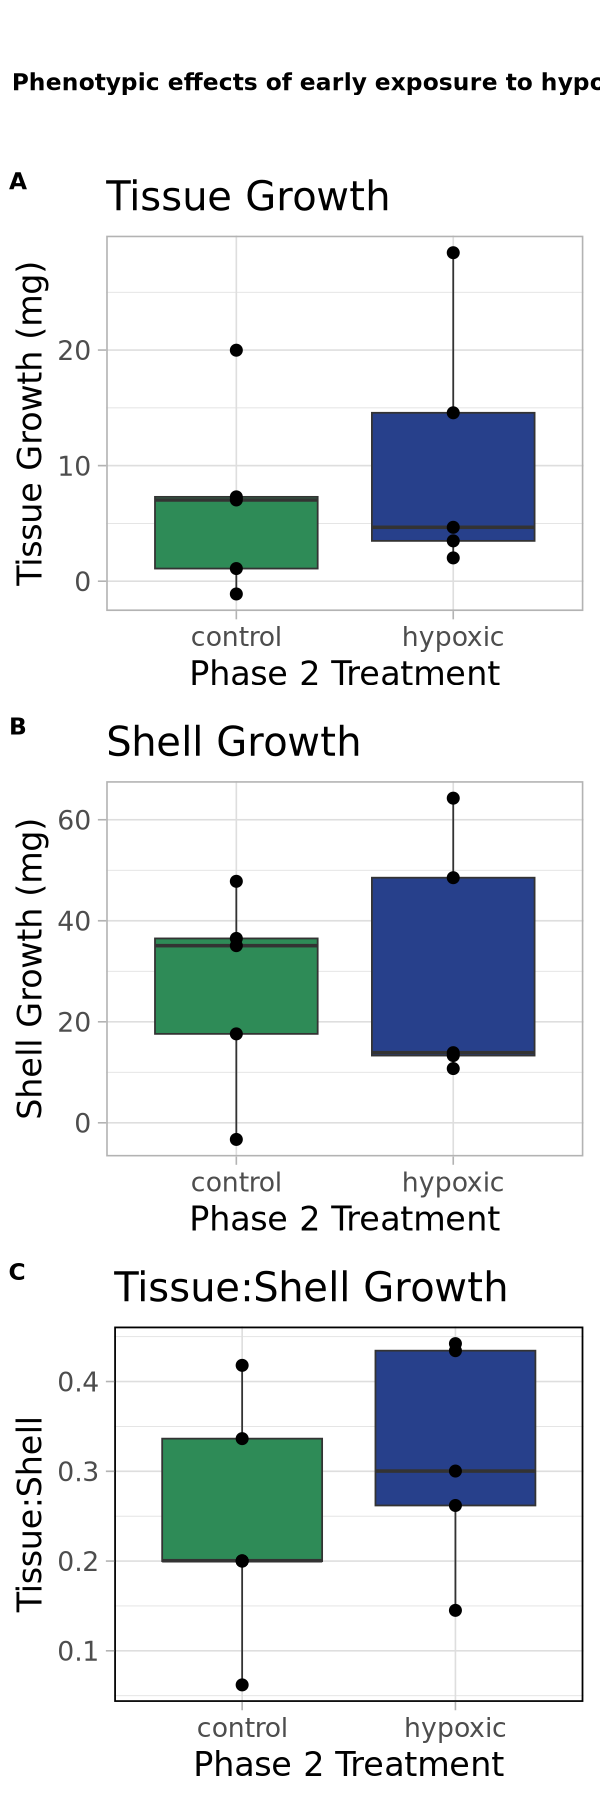

In [18]:
options(repr.plot.width=5, repr.plot.height=15)

combined_plot <- plot_grid(plot6, plot5, plot4, align = 'h', nrow =3, labels='AUTO')

# now add the title
title <- ggdraw() + 
  draw_label(
    "Phenotypic effects of early exposure to hypoxia on second treatment",
    fontface = 'bold',
    x = 0,
    hjust = 0
  ) +
  theme(
    # add margin on the left of the drawing canvas,
    # so title is aligned with left edge of first plot
    plot.margin = margin(0, 0, 0, 7)
  )
plot_grid(
  title, combined_plot,
  ncol = 1,
  # rel_heights values control vertical title margins
  rel_heights = c(0.1, 1)
)

## III. Looking at effects of early exposure to control
aka phase1=control, phase2=hypoxia or control

In [19]:
p1c <- filter(df, df$Phase1 == 'control')
p1c

sample,Phase1,Phase2,t.s_ratio,s.growth_mg,t.growth_mg
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
WBB-WBV-W69,control,control,0.5762559,22.33140,12.86860
WBG-BBB-W56,control,hypoxic,0.5746725,77.73045,44.66955
WBG-WBG-W44,control,control,0.2864338,78.58935,22.51065
WBO-BBR-W03,control,hypoxic,0.4874679,16.60540,8.09460
WBO-WBV-W64,control,control,0.2676888,44.80595,11.99405
WBR-BBY-W25,control,hypoxic,0.2395642,19.03895,4.56105
WBV-WBO-W23,control,control,0.3508731,21.61565,7.58435
WBV-WBR-W12,control,control,0.4540844,26.33960,11.96040
WBY-BBV-W65,control,hypoxic,0.4893996,15.17390,7.42610


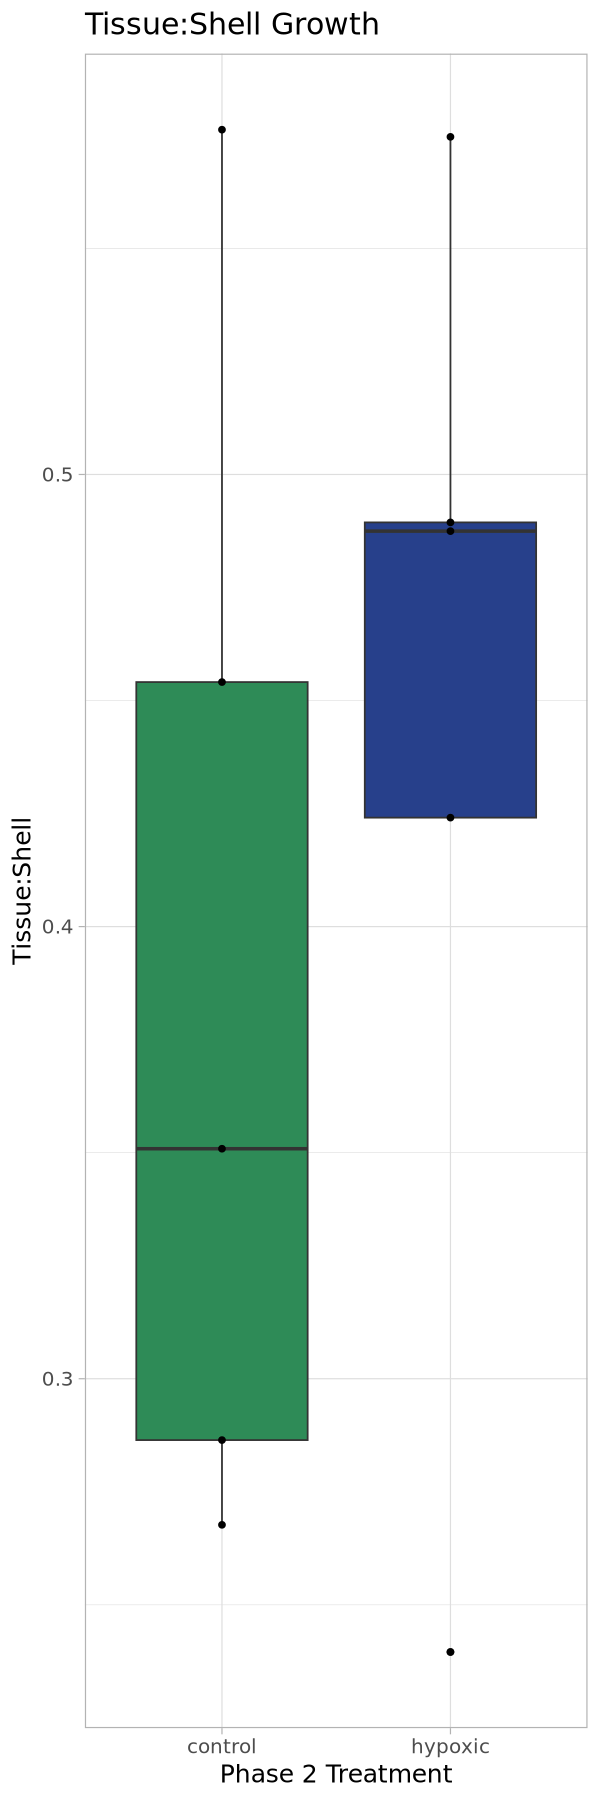

In [20]:
plot7 <- ggplot(p1c, aes(x=Phase2, y=t.s_ratio, fill=Phase2)) +
geom_boxplot(show.legend = FALSE) +
geom_point(show.legend = FALSE) +
theme_light(base_size = 15) +
scale_fill_manual(values = c('seagreen4','royalblue4')) +
labs(title = 'Tissue:Shell Growth', 
    x = 'Phase 2 Treatment', y = 'Tissue:Shell')
#geom_signif(comparisons = list(c('hypoxic','control')), map_signif_level=TRUE)

plot7

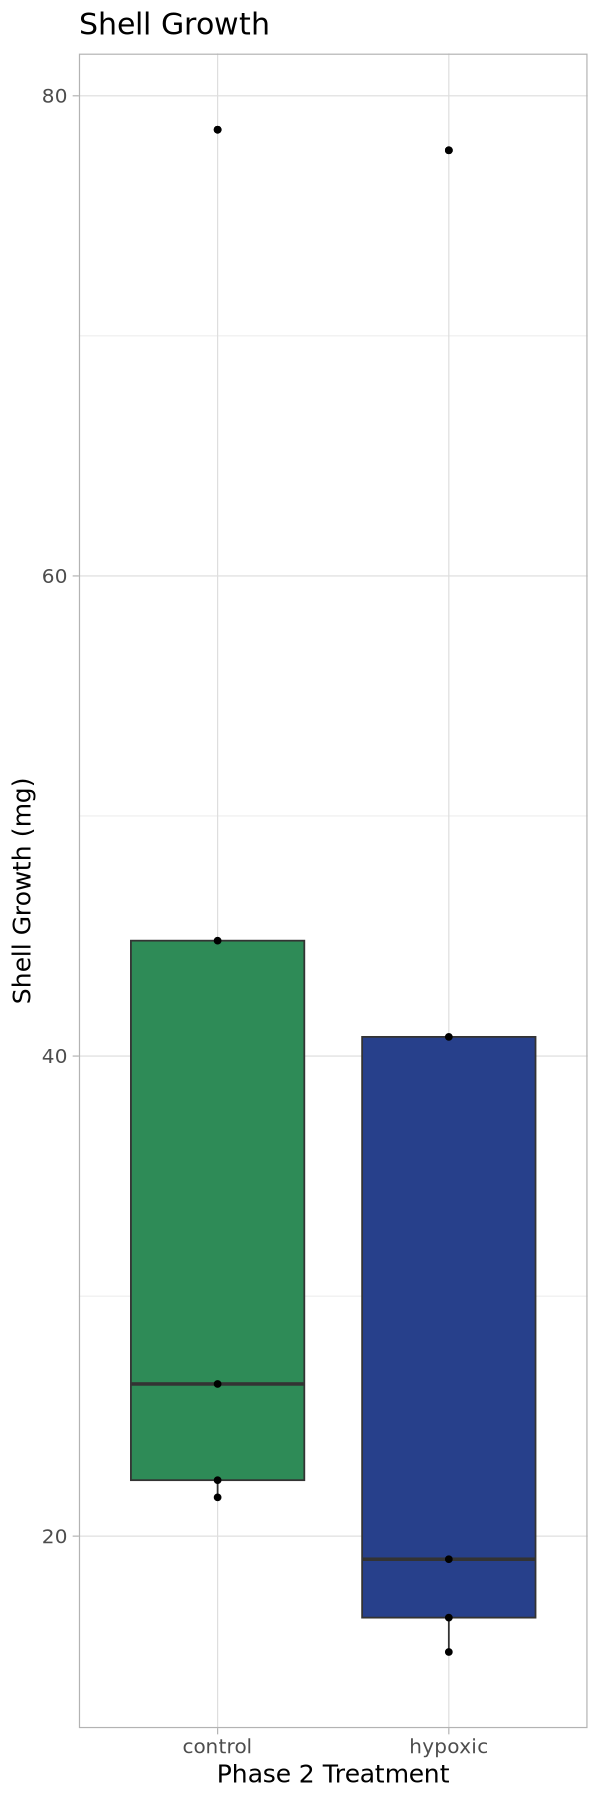

In [21]:
plot8 <- ggplot(p1c, aes(x=Phase2, y=s.growth_mg, fill=Phase2)) +
geom_boxplot(show.legend = FALSE) +
geom_point(show.legend = FALSE) +
theme_light(base_size = 15) +
scale_fill_manual(values = c('seagreen4','royalblue4')) +
labs(title = 'Shell Growth', 
    x = 'Phase 2 Treatment', y = 'Shell Growth (mg)') 
#geom_signif(comparisons = list(c('hypoxic','control')), map_signif_level=TRUE)

plot8

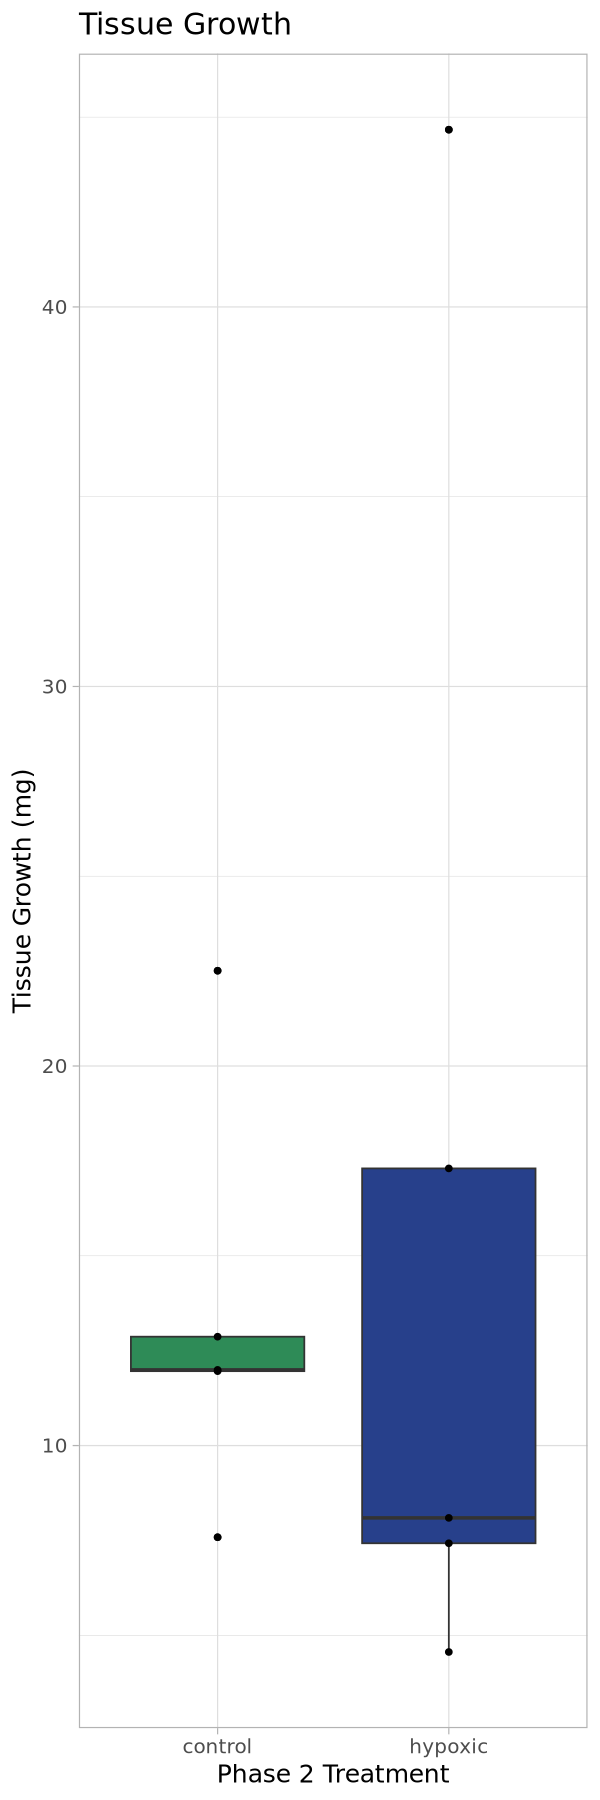

In [22]:
plot9 <- ggplot(p1c, aes(x=Phase2, y=t.growth_mg, fill=Phase2)) +
geom_boxplot(show.legend = FALSE) +
geom_point(show.legend = FALSE) +
theme_light(base_size = 15) +
scale_fill_manual(values = c('seagreen4','royalblue4')) +
labs(title = 'Tissue Growth', 
    x = 'Phase 2 Treatment', y = 'Tissue Growth (mg)') 
#geom_signif(comparisons = list(c('hypoxic','control')), map_signif_level=TRUE)

plot9

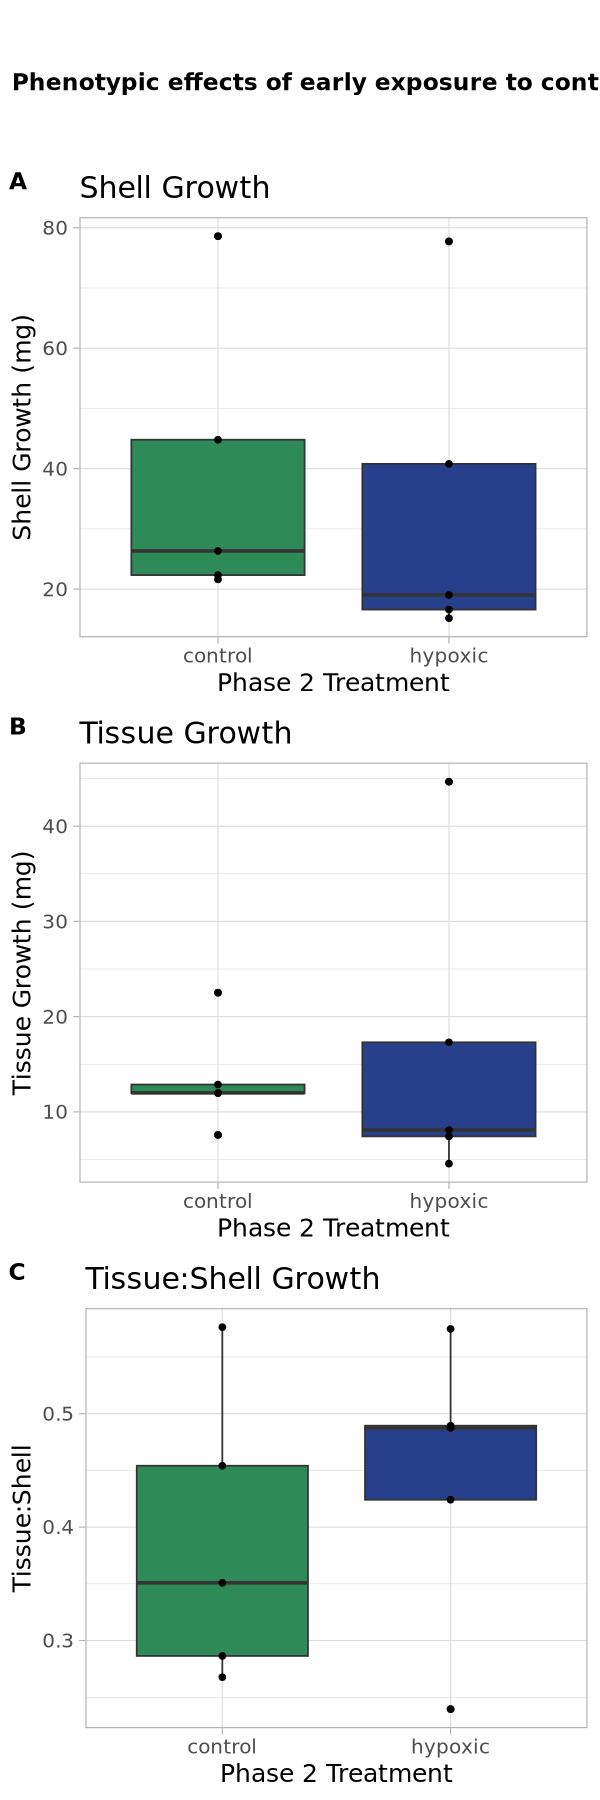

In [23]:
combined_plot <- plot_grid(plot8, plot9, plot7, align = 'h', nrow =3, labels='AUTO')

# now add the title
title <- ggdraw() + 
  draw_label(
    "Phenotypic effects of early exposure to control on second treatment",
    fontface = 'bold',
    x = 0,
    hjust = 0
  ) +
  theme(
    # add margin on the left of the drawing canvas,
    # so title is aligned with left edge of first plot
    plot.margin = margin(0, 0, 0, 7)
  )
plot_grid(
  title, combined_plot,
  ncol = 1,
  # rel_heights values control vertical title margins
  rel_heights = c(0.1, 1)
)

## III. Combining P1 Control and P1 Hypoxic Plots
aka phase1=hypoxia or control, phase2=hypoxia or control

In [24]:
p <- filter(df, df$Phase1 == 'hypoxic' | df$Phase1 == 'control')
p

sample,Phase1,Phase2,t.s_ratio,s.growth_mg,t.growth_mg
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
BBB-WBO-B21,hypoxic,control,0.20039633,35.07175,7.02825
BBB-WBV-B70,hypoxic,control,0.33639083,-3.29245,-1.10755
BBO-BBO-B16,hypoxic,hypoxic,0.14507528,13.88555,2.01445
BBO-BBY-B27,hypoxic,hypoxic,0.44225496,64.27435,28.42565
BBO-WBO-B16,hypoxic,control,0.19989316,36.50325,7.29675
BBO-WBV-B64,hypoxic,control,0.41805108,47.81210,19.98790
BBR-BBB-B50,hypoxic,hypoxic,0.26192917,13.31295,3.48705
BBR-BBG-B38,hypoxic,hypoxic,0.30028427,48.52785,14.57215
BBR-BBY-B26,hypoxic,hypoxic,0.43439283,10.73625,4.66375


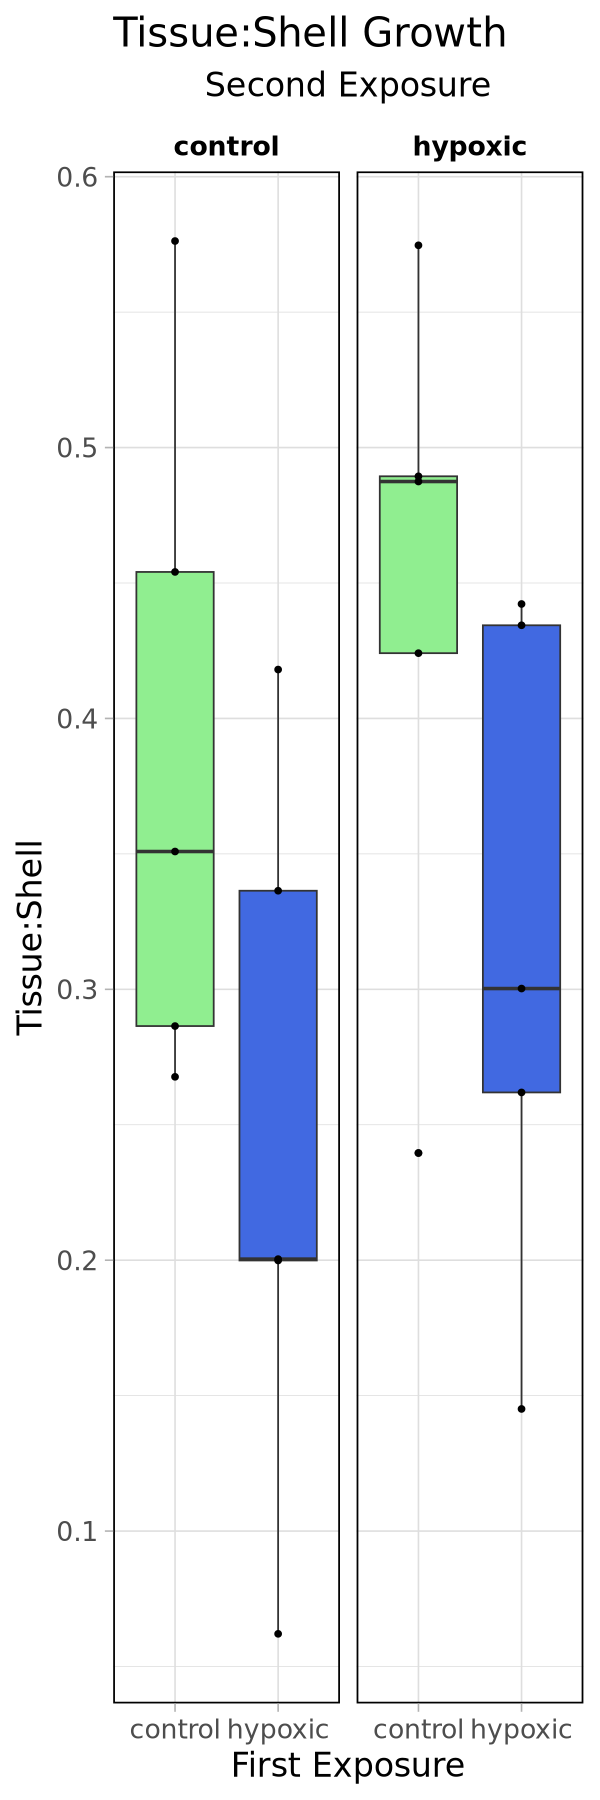

In [25]:
plot10 <- ggplot(p, aes(x=Phase1, y=t.s_ratio, fill=Phase1)) +
geom_boxplot(show.legend = FALSE) +
facet_grid(~Phase2) +
geom_point(show.legend = FALSE) +
theme_light(base_size = 20) +
scale_fill_manual(values = c('lightgreen','royalblue')) +
theme(strip.text = element_text(color='black', face = 'bold'),
      strip.background = element_rect('transparent'),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      plot.subtitle=element_text(hjust=0.5)) + 
labs(title = 'Tissue:Shell Growth', subtitle = 'Second Exposure',
    x = 'First Exposure', y = 'Tissue:Shell')
#geom_signif(comparisons = list(c('hypoxic','control')), map_signif_level=TRUE)

plot10

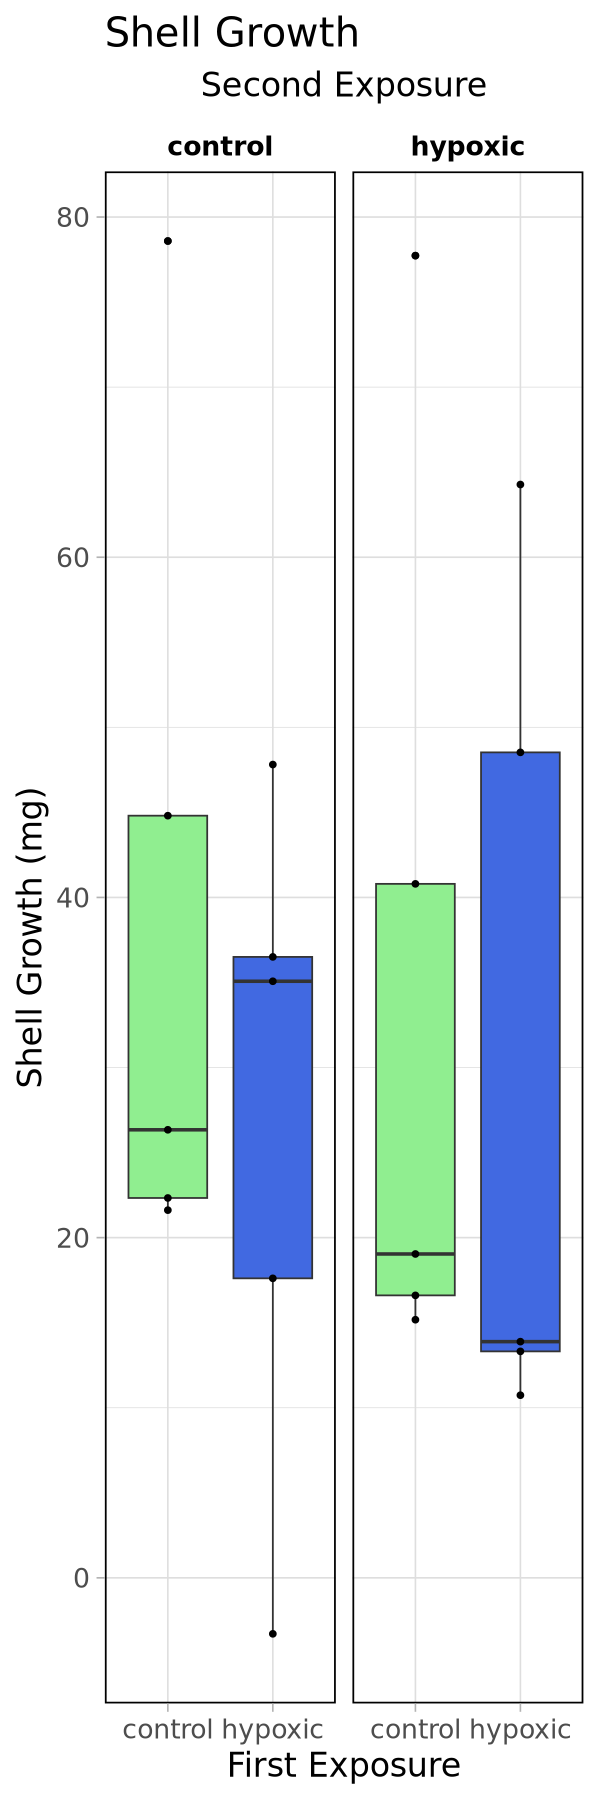

In [26]:
plot11 <- ggplot(p, aes(x=Phase1, y=s.growth_mg, fill=Phase1)) +
geom_boxplot(show.legend = FALSE) +
facet_grid(~Phase2) +
geom_point(show.legend = FALSE) +
theme_light(base_size = 20) +
scale_fill_manual(values = c('lightgreen','royalblue')) +
theme(strip.text = element_text(color='black', face = 'bold'),
      strip.background = element_rect('transparent'),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      plot.subtitle=element_text(hjust=0.5)) + 
labs(title = 'Shell Growth', subtitle = 'Second Exposure',
    x = 'First Exposure', y = 'Shell Growth (mg)') 
#geom_signif(comparisons = list(c('hypoxic','control')), map_signif_level=TRUE)

plot11

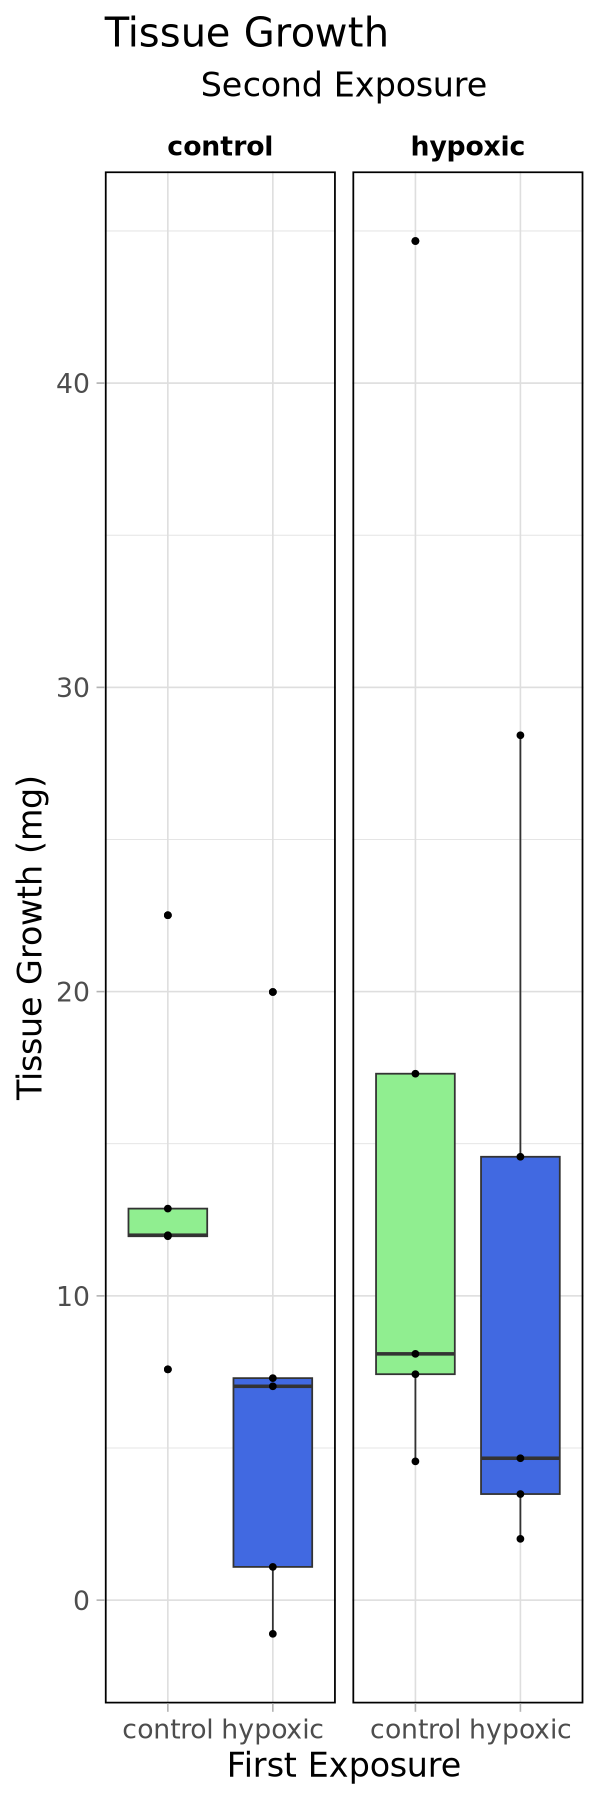

In [27]:
plot12 <- ggplot(p, aes(x=Phase1, y=t.growth_mg, fill=Phase1)) +
geom_boxplot(show.legend = FALSE) +
facet_grid(~Phase2) +
geom_point(show.legend = FALSE) +
theme_light(base_size = 20) +
theme(strip.text = element_text(color='black', face = 'bold'),
      strip.background = element_rect('transparent'),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
      plot.subtitle=element_text(hjust=0.5)) + 
scale_fill_manual(values = c('lightgreen','royalblue')) +
labs(title = 'Tissue Growth', subtitle = 'Second Exposure',
    x = 'First Exposure', y = 'Tissue Growth (mg)') 
#geom_signif(comparisons = list(c('hypoxic','control')), map_signif_level=TRUE)

plot12

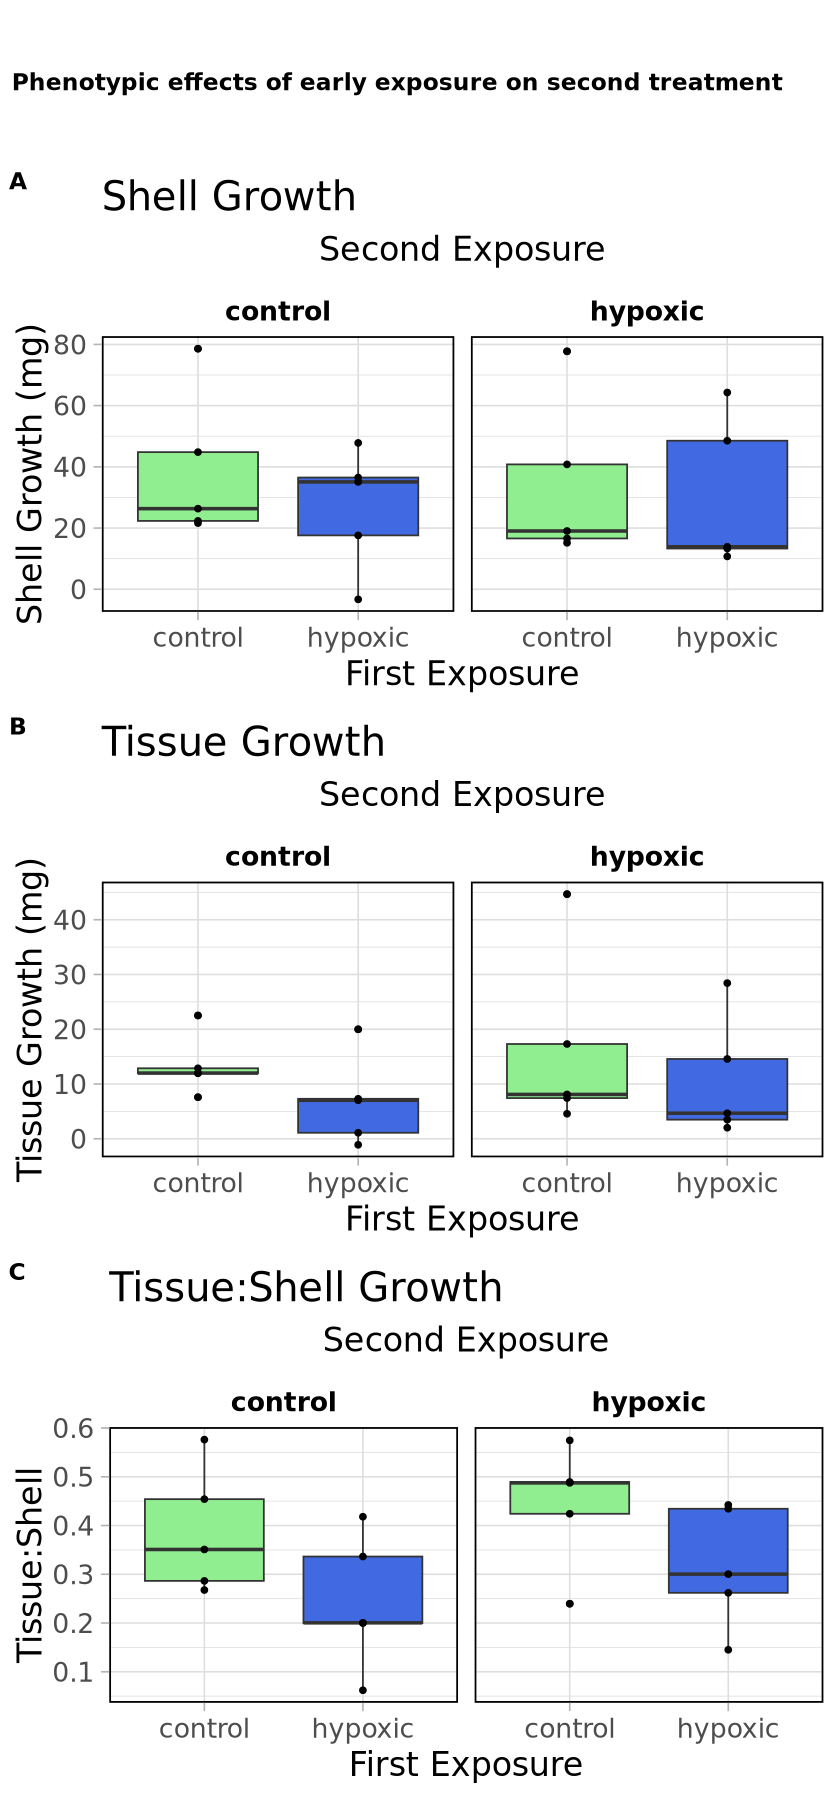

In [28]:
options(repr.plot.width=7, repr.plot.height=15)


combined_plot <- plot_grid(plot11, plot12, plot10, align = 'h', nrow =3, labels='AUTO')

# now add the title
title <- ggdraw() + 
  draw_label(
    "Phenotypic effects of early exposure on second treatment",
    fontface = 'bold',
    x = 0,
    hjust = 0
  ) +
  theme(
    # add margin on the left of the drawing canvas,
    # so title is aligned with left edge of first plot
    plot.margin = margin(0, 0, 0, 7)
  )
plot_grid(
  title, combined_plot,
  ncol = 1,
  # rel_heights values control vertical title margins
  rel_heights = c(0.1, 1)
)

In [29]:
# saving plot as pdf file

# open pdf file
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures')
pdf('p1hc_hc_phenotypes.pdf', width=10, height=20)

# open plot
combined_plot <- plot_grid(plot10, plot11, plot12, align = 'h', nrow =3, labels='AUTO')

# now add the title
title <- ggdraw() + 
  draw_label(
    "Phenotypic effects of early exposure on second treatment",
    fontface = 'bold',
    x = 0,
    hjust = 0
  ) +
  theme(
    # add margin on the left of the drawing canvas,
    # so title is aligned with left edge of first plot
    plot.margin = margin(0, 0, 0, 7)
  )
plot_grid(
  title, combined_plot,
  ncol = 1,
  # rel_heights values control vertical title margins
  rel_heights = c(0.1, 1)
)

# close pdf file
dev.off()

png 
  2

faceting by first exposure

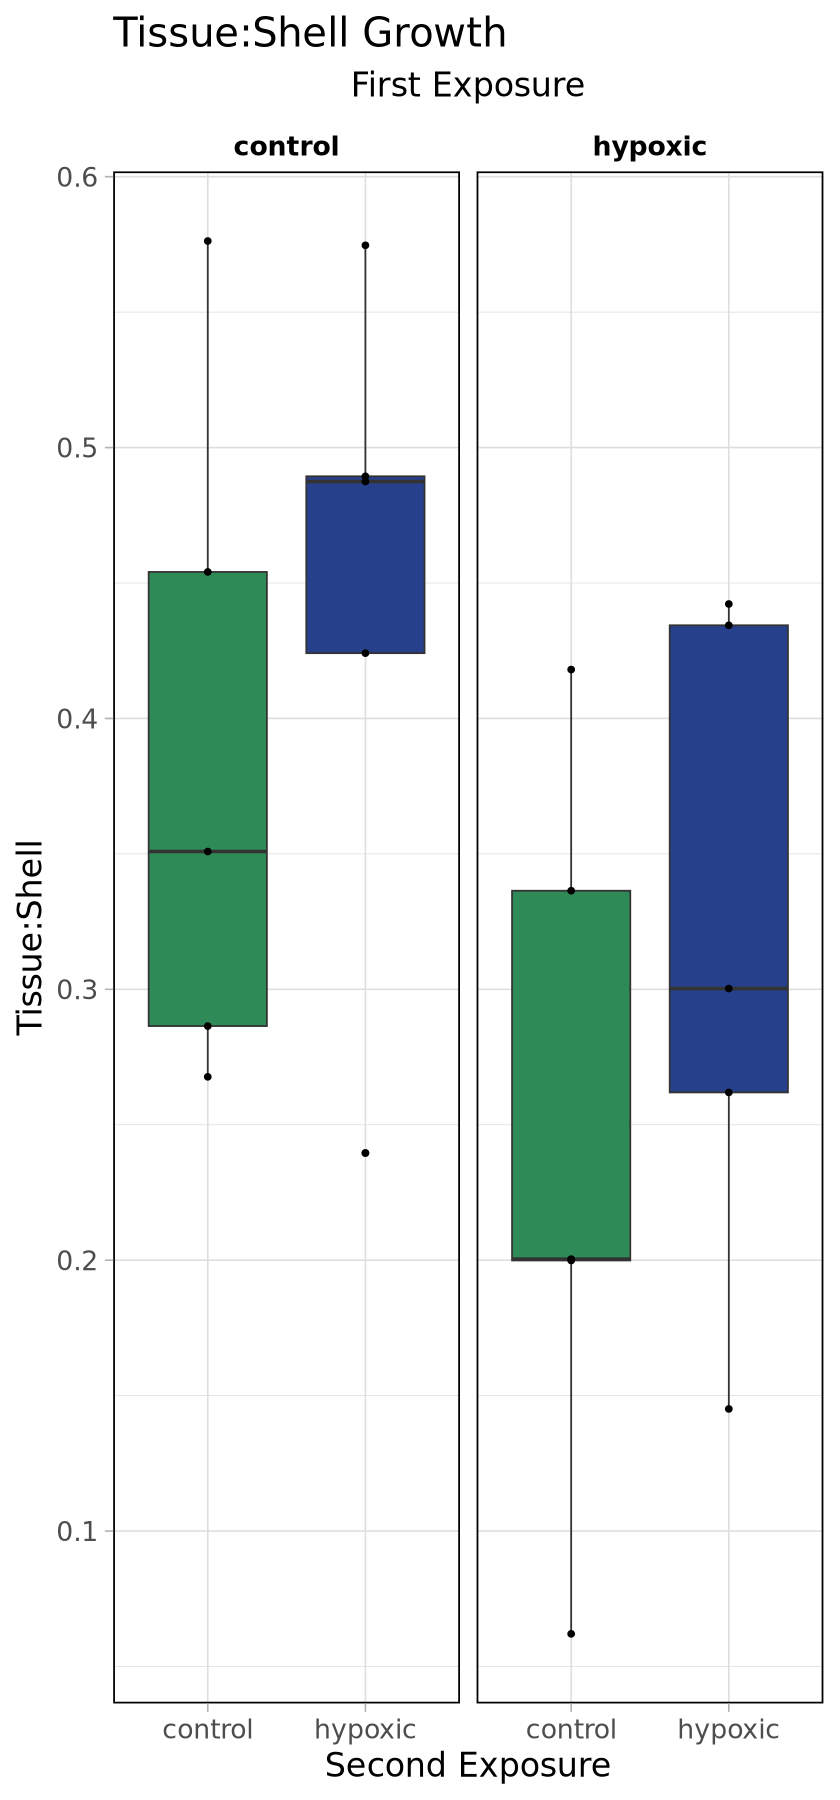

In [30]:
plot14 <- ggplot(p, aes(x=Phase2, y=t.s_ratio, fill=Phase2)) +
geom_boxplot(show.legend = FALSE) +
facet_grid(~Phase1) +
geom_point(show.legend = FALSE) +
theme_light(base_size = 20) +
scale_fill_manual(values = c('seagreen4','royalblue4')) +
theme(strip.text = element_text(color='black', face = 'bold'), 
      plot.subtitle=element_text(hjust=0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
     strip.background = element_rect('transparent')) + 
labs(title = 'Tissue:Shell Growth', subtitle = 'First Exposure',
    x = 'Second Exposure', y = 'Tissue:Shell')
#geom_signif(comparisons = list(c('hypoxic','control')), map_signif_level=TRUE)

plot14

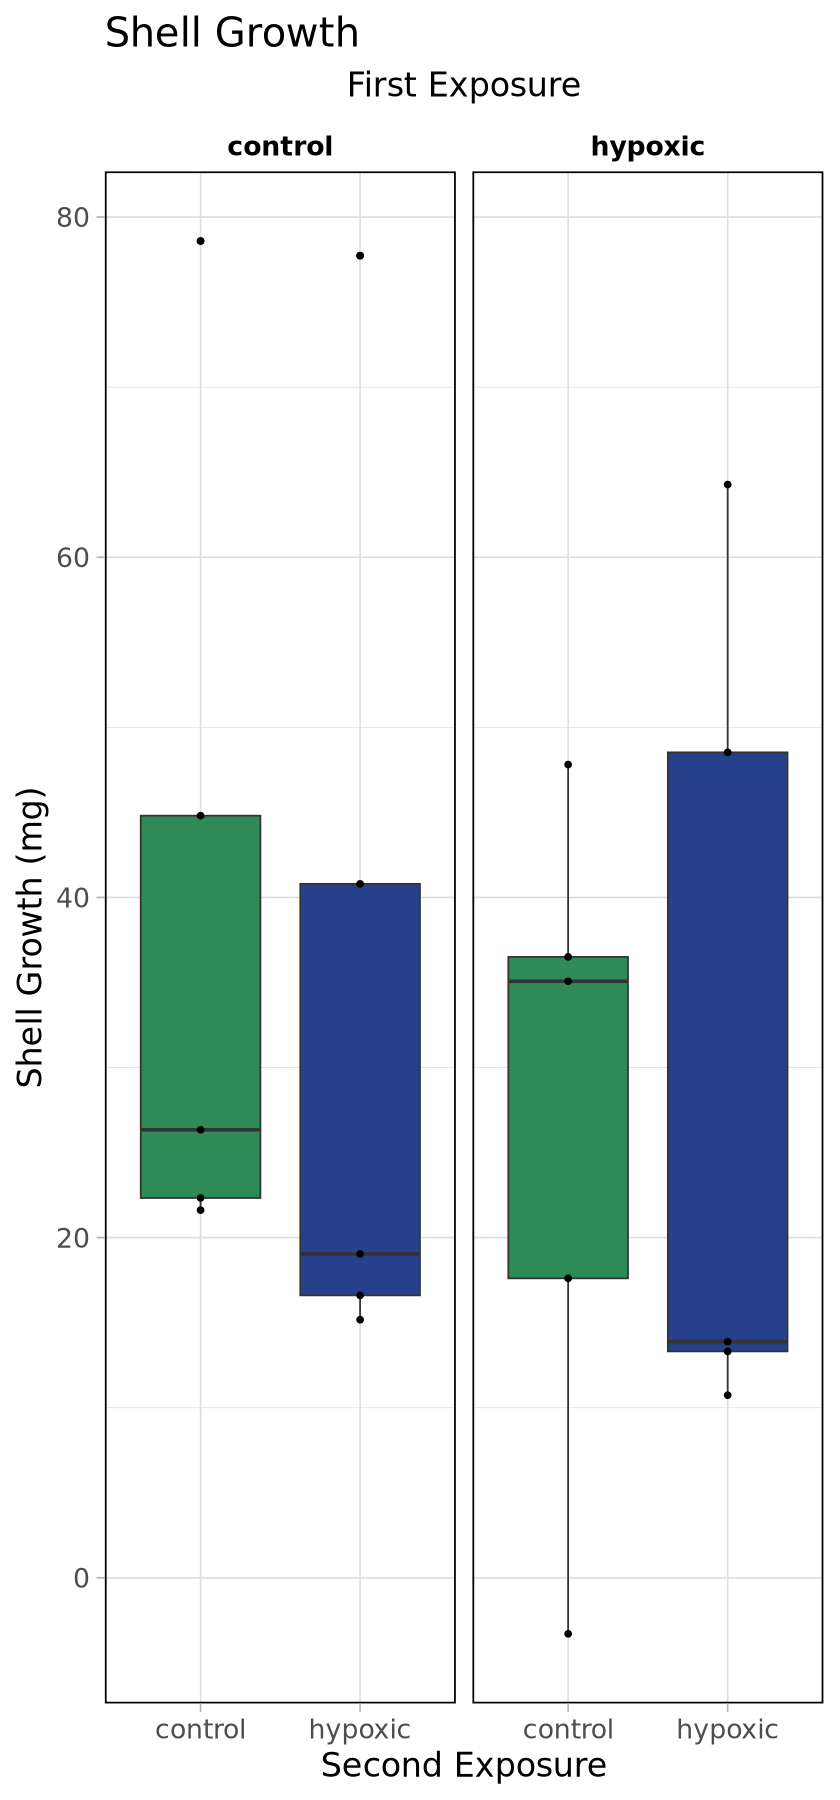

In [31]:
plot15 <- ggplot(p, aes(x=Phase2, y=s.growth_mg, fill=Phase2)) +
geom_boxplot(show.legend = FALSE) +
facet_grid(~Phase1) +
geom_point(show.legend = FALSE) +
theme_light(base_size = 20) +
scale_fill_manual(values = c('seagreen4','royalblue4')) +
theme(strip.text = element_text(color='black', face = 'bold'), 
      plot.subtitle=element_text(hjust=0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
     strip.background = element_rect('transparent')) + 
labs(title = 'Shell Growth', subtitle = 'First Exposure',
    x = 'Second Exposure', y = 'Shell Growth (mg)') 
#geom_signif(comparisons = list(c('hypoxic','control')), map_signif_level=TRUE)

plot15

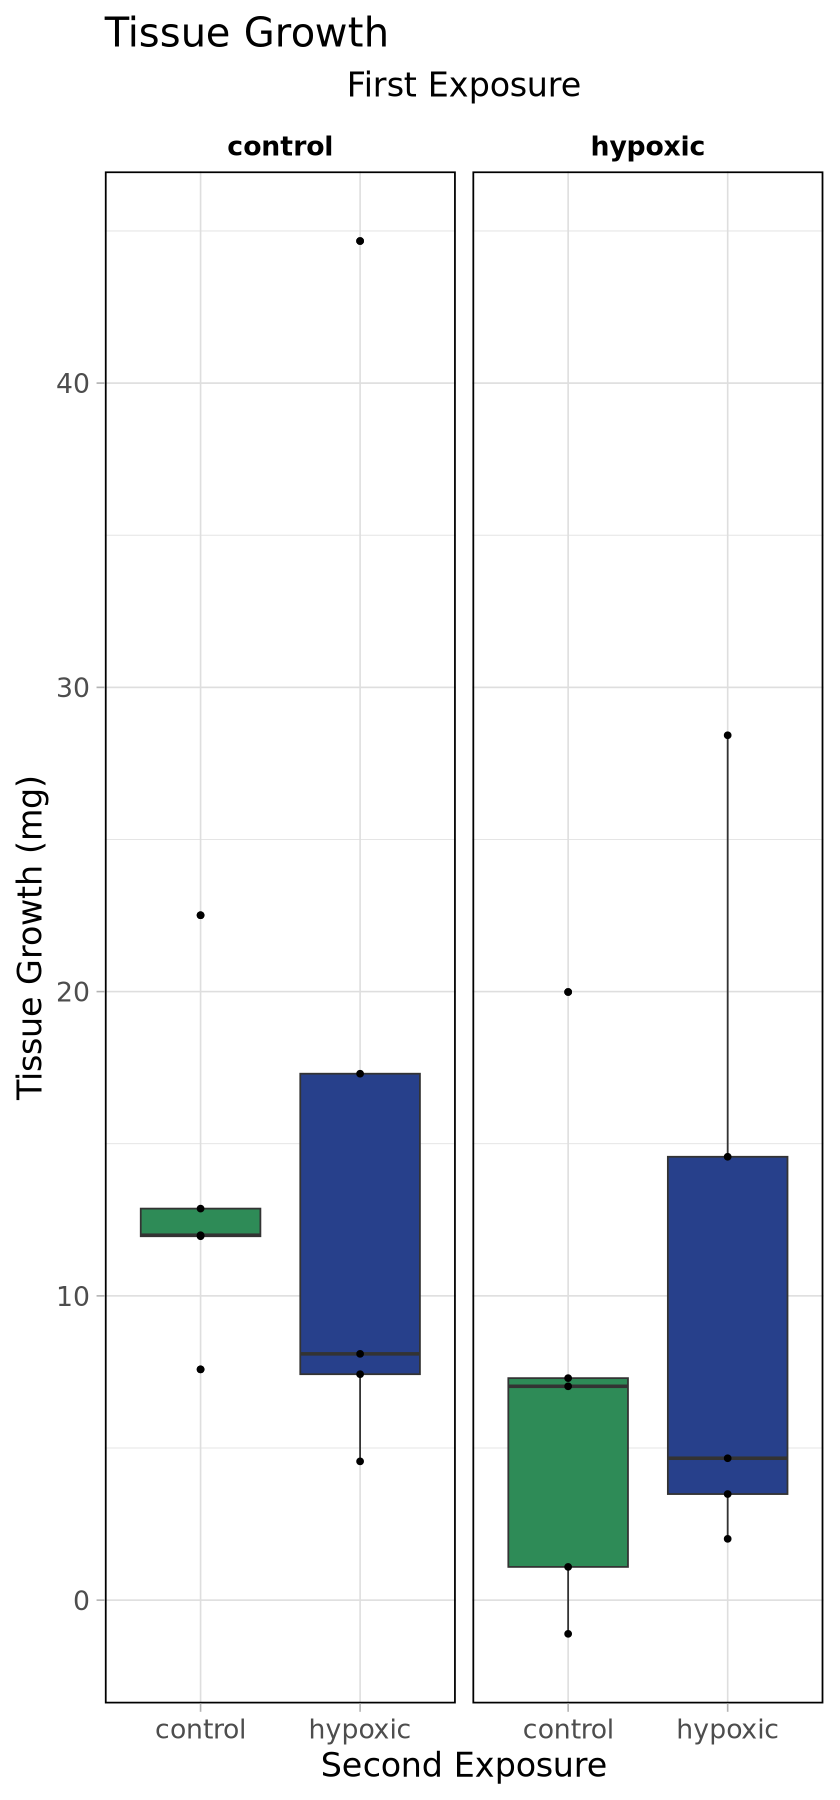

In [32]:
plot16 <- ggplot(p, aes(x=Phase2, y=t.growth_mg, fill=Phase2)) +
geom_boxplot(show.legend = FALSE) +
facet_grid(~Phase1) +
geom_point(show.legend = FALSE) +
theme_light(base_size = 20) +
theme(strip.text = element_text(color='black', face = 'bold'), 
      plot.subtitle=element_text(hjust=0.5),
      panel.border = element_rect(color = 'black', fill = NA, linewidth = 1),
     strip.background = element_rect('transparent')) + 
scale_fill_manual(values = c('seagreen4','royalblue4')) +
labs(title = 'Tissue Growth', subtitle = 'First Exposure',
    x = 'Second Exposure', y = 'Tissue Growth (mg)') 
#geom_signif(comparisons = list(c('hypoxic','control')), map_signif_level=TRUE)

plot16

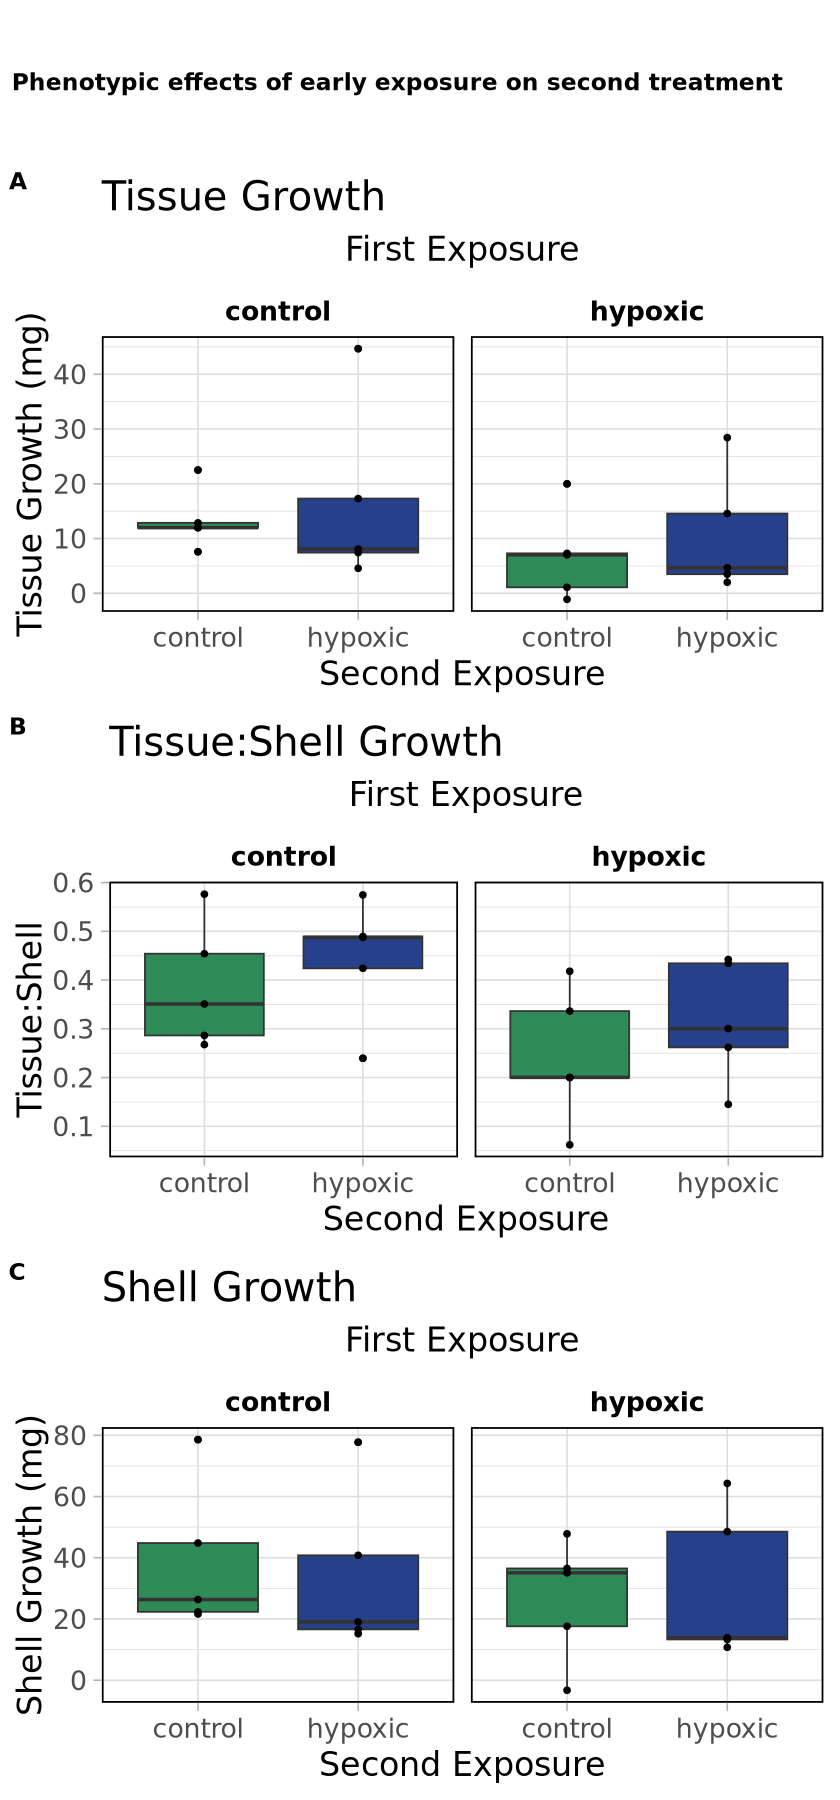

In [33]:
combined_plot <- plot_grid(plot16, plot14, plot15, align = 'h', nrow =3, labels='AUTO')

# now add the title
title <- ggdraw() + 
  draw_label(
    "Phenotypic effects of early exposure on second treatment",
    fontface = 'bold',
    x = 0,
    hjust = 0
  ) +
  theme(
    # add margin on the left of the drawing canvas,
    # so title is aligned with left edge of first plot
    plot.margin = margin(0, 0, 0, 7)
  )
plot_grid(
  title, combined_plot,
  ncol = 1,
  # rel_heights values control vertical title margins
  rel_heights = c(0.1, 1)
)

In [34]:
# saving plot as pdf file

# open pdf file
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures')
pdf('ce_facetp1_phenotypes.pdf', width=10, height=20)

combined_plot <- plot_grid(plot14, plot15, plot16, align = 'h', nrow =3, labels='AUTO')

# now add the title
title <- ggdraw() + 
  draw_label(
    "Phenotypic effects of early exposure on second treatment",
    fontface = 'bold',
    x = 0,
    hjust = 0
  ) +
  theme(
    # add margin on the left of the drawing canvas,
    # so title is aligned with left edge of first plot
    plot.margin = margin(0, 0, 0, 7)
  )
plot_grid(
  title, combined_plot,
  ncol = 1,
  # rel_heights values control vertical title margins
  rel_heights = c(0.1, 1)
)

# close pdf file
dev.off()

png 
  2